# Stock Price prediction

Case study on the price prediction of the stock price of RELIANCE INDUSTRIES (RELIANCE.NS)

In the process of price prediction of the share price of RELIANCE INDUSTRIES (RELIANCE.NS), the first step is to import the data of share price of RELIANCE INDUSTRIES (RELIANCE.NS) from the yahoofinance.com https://finance.yahoo.com/quote/RELIANCE.NS/history?period1=1325376000&period2=1672531200&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true
The data imported were 11 years data from the date 2012-01-01 to 2023-01-01

In [1]:
#importing libraries 
from datetime import datetime
import yfinance as yf
import matplotlib.pyplot as plt
import math
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
import numpy as np  
import pandas as pd
%matplotlib inline
plt.style.use('fivethirtyeight')

Here we are getting the shape of data i.e.2580 Rows and 6 Columns.

In [2]:
# getting the data
start_date = datetime(2012, 1, 1)
end_date = datetime(2023, 1, 1)

# get the data
df = yf.download('RELIANCE.NS', start = start_date,
                   end = end_date)


[*********************100%***********************]  1 of 1 completed


Plotting the graph of the imported data

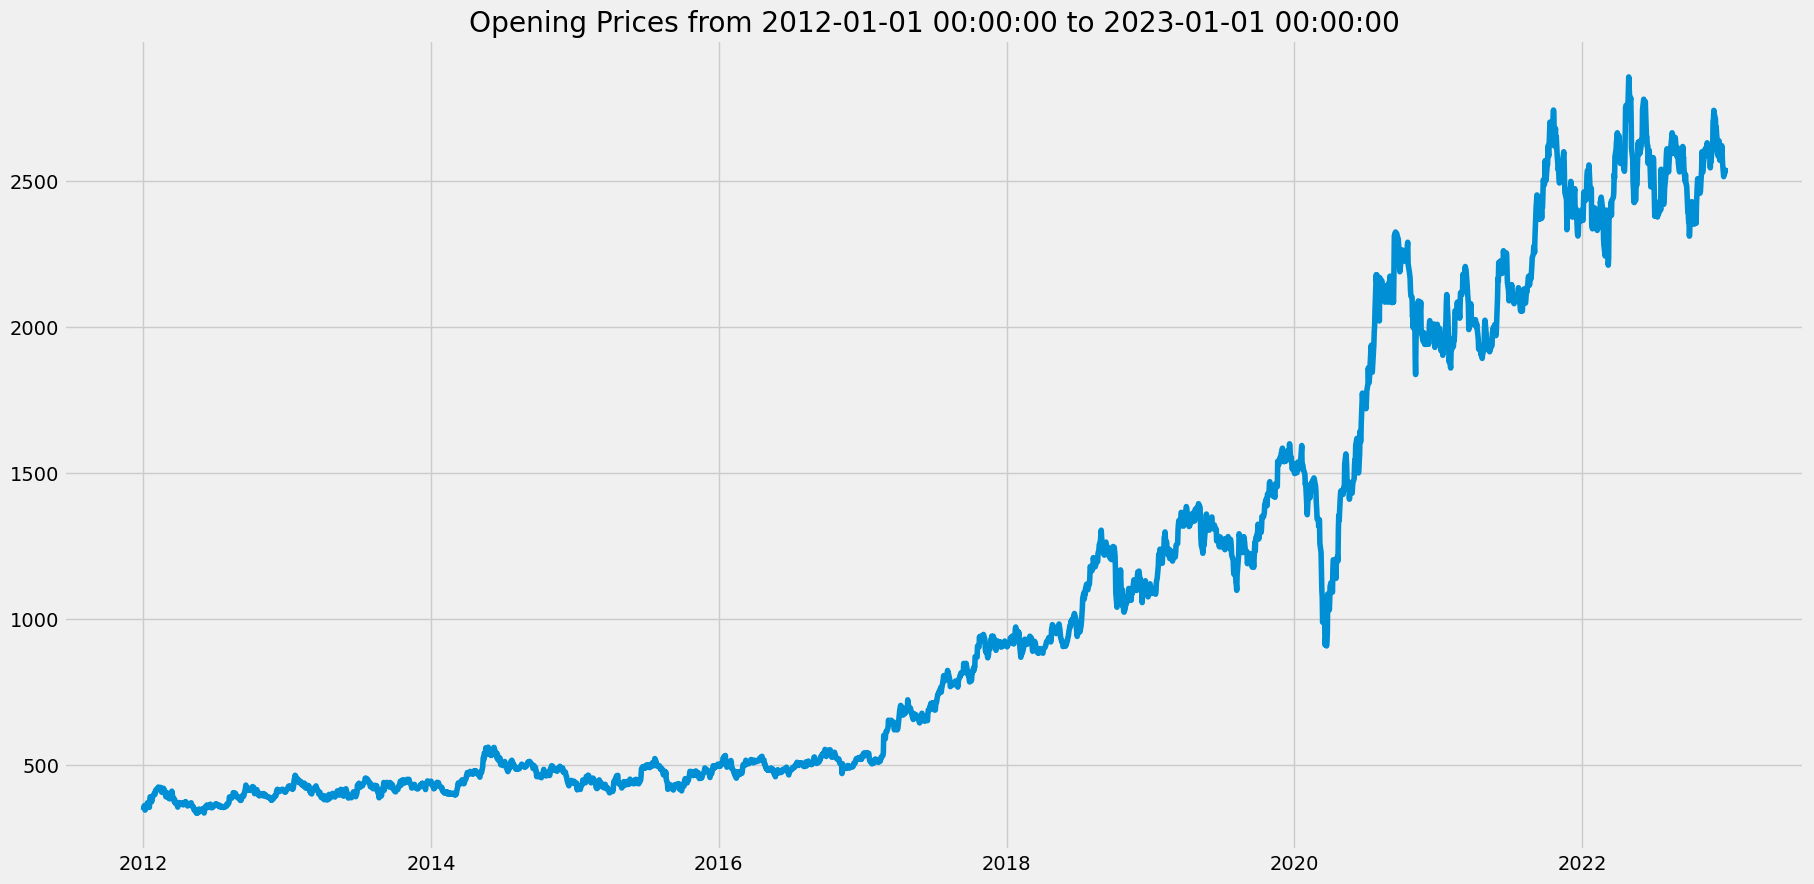

In [3]:
# display
plt.figure(figsize = (20,10))
plt.title('Opening Prices from {} to {}'.format(start_date,
                                                end_date))
plt.plot(df['Open'])
plt.show()

In [4]:
# get the no. of rows and columns in the data set
df.shape

(2713, 6)

Sorting the 80% of the data for training purpose.

In [6]:
#create a new data frame with just Closing prise data
data =df.filter(['Close'])
#converting the data into numpy array
dataset = data.values
#giving the no. of rows to train the model on
train_dl =math.ceil(len(dataset)*.8)
train_dl

2171

In [7]:
#Scaling the data
scaler = MinMaxScaler(feature_range =(0,1))
scaled_d= scaler.fit_transform(dataset)

scaled_d

array([[0.0060693 ],
       [0.00967698],
       [0.00798277],
       ...,
       [0.88917385],
       [0.88871111],
       [0.8902805 ]])

In [8]:
#Creating training data
#Creating scaled data training
train_d= scaled_d[0:train_dl, :]
#split the data into x_train and y_train data sets
x_train =[]
y_train =[]

for i in range(60,len(train_d)):
    x_train.append(train_d[i-60:i, 0])
    y_train.append(train_d[i,0])
    if i<=61:
        print(x_train)
        print(y_train)
        print()
        


[array([0.0060693 , 0.00967698, 0.00798277, 0.00466409, 0.00826181,
       0.00600949, 0.01197914, 0.01438094, 0.01211866, 0.01110213,
       0.00734495, 0.01314516, 0.02065952, 0.02183551, 0.02323075,
       0.0190251 , 0.02145679, 0.02289191, 0.02876188, 0.02364932,
       0.02810412, 0.03091453, 0.03052585, 0.0323297 , 0.03127331,
       0.03357545, 0.03633603, 0.03542912, 0.03331634, 0.03451226,
       0.03444249, 0.03200083, 0.02717728, 0.02832337, 0.03337614,
       0.03135304, 0.03258882, 0.02867218, 0.02099836, 0.02399813,
       0.02883163, 0.02687831, 0.02750616, 0.02419745, 0.02002169,
       0.01708173, 0.01947356, 0.02440674, 0.02867218, 0.02758589,
       0.02402802, 0.01918455, 0.01574629, 0.01683258, 0.01832747,
       0.01200903, 0.01354379, 0.01076329, 0.01095263, 0.00988627])]
[0.009676984256488524]

[array([0.0060693 , 0.00967698, 0.00798277, 0.00466409, 0.00826181,
       0.00600949, 0.01197914, 0.01438094, 0.01211866, 0.01110213,
       0.00734495, 0.01314516, 0.0

In [9]:
#converting the x_train  and y_train to numpy arrays
x_train,y_train =np.array(x_train), np.array(y_train)


In [10]:
#reshaping the data
x_train =np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(2111, 60, 1)

Adding layers of LSTM to the trained data and Adding the Dense layer after that.

In [11]:
#Building the LSTM model
model=Sequential()
model.add(LSTM(50,return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [12]:
#Compiling the model
model.compile(optimizer='Adam', loss ='mean_squared_error')

In [13]:
#train the model
model.fit(x_train,y_train, batch_size=1, epochs=10)

Epoch 1/10
2111/2111 [==============================] - 79s 35ms/step - loss: 9.0389e-04
Epoch 2/10
2111/2111 [==============================] - 72s 34ms/step - loss: 4.5934e-04
Epoch 3/10
2111/2111 [==============================] - 72s 34ms/step - loss: 2.1842e-04
Epoch 4/10
2111/2111 [==============================] - 71s 34ms/step - loss: 2.8470e-04
Epoch 5/10
2111/2111 [==============================] - 72s 34ms/step - loss: 1.9208e-04
Epoch 6/10
2111/2111 [==============================] - 72s 34ms/step - loss: 2.0158e-04
Epoch 7/10
2111/2111 [==============================] - 72s 34ms/step - loss: 1.5996e-04
Epoch 8/10
2111/2111 [==============================] - 72s 34ms/step - loss: 1.6765e-04
Epoch 9/10
2111/2111 [==============================] - 69s 33ms/step - loss: 1.5352e-04
Epoch 10/10
2111/2111 [==============================] - 72s 34ms/step - loss: 1.3984e-04


In [14]:
# Create the testing dataset
# Create a new array containing scaled values from index 1543 to 2003
test_d = scaled_d[train_dl -60:, :]
#creating x_test and y_test data
x_test =[]
y_test = dataset[train_dl:, :]
for i in range(60, len(test_d)):
    x_test.append(test_d[i-60:i,0])
    

In [15]:
#convert the data to a numpy array
x_test =np.array(x_test)

In [16]:
#Reshape  the data
x_test =np.reshape(x_test,(x_test.shape[0], x_test.shape[1], 1))

In [17]:
#Get the models predicted price values
predictions =model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

17/17 [==============================] - 2s 22ms/step


In [18]:
# Get the root mean squared error(RMSE)
rmse = np.sqrt(np.mean(predictions -y_test)**2)
rmse 

27.732532233769604

Plotting the predictions along with the actual data to test the accuracy

C:\Users\Rani Priya\AppData\Local\Temp\ipykernel_20456\1780526473.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']= predictions


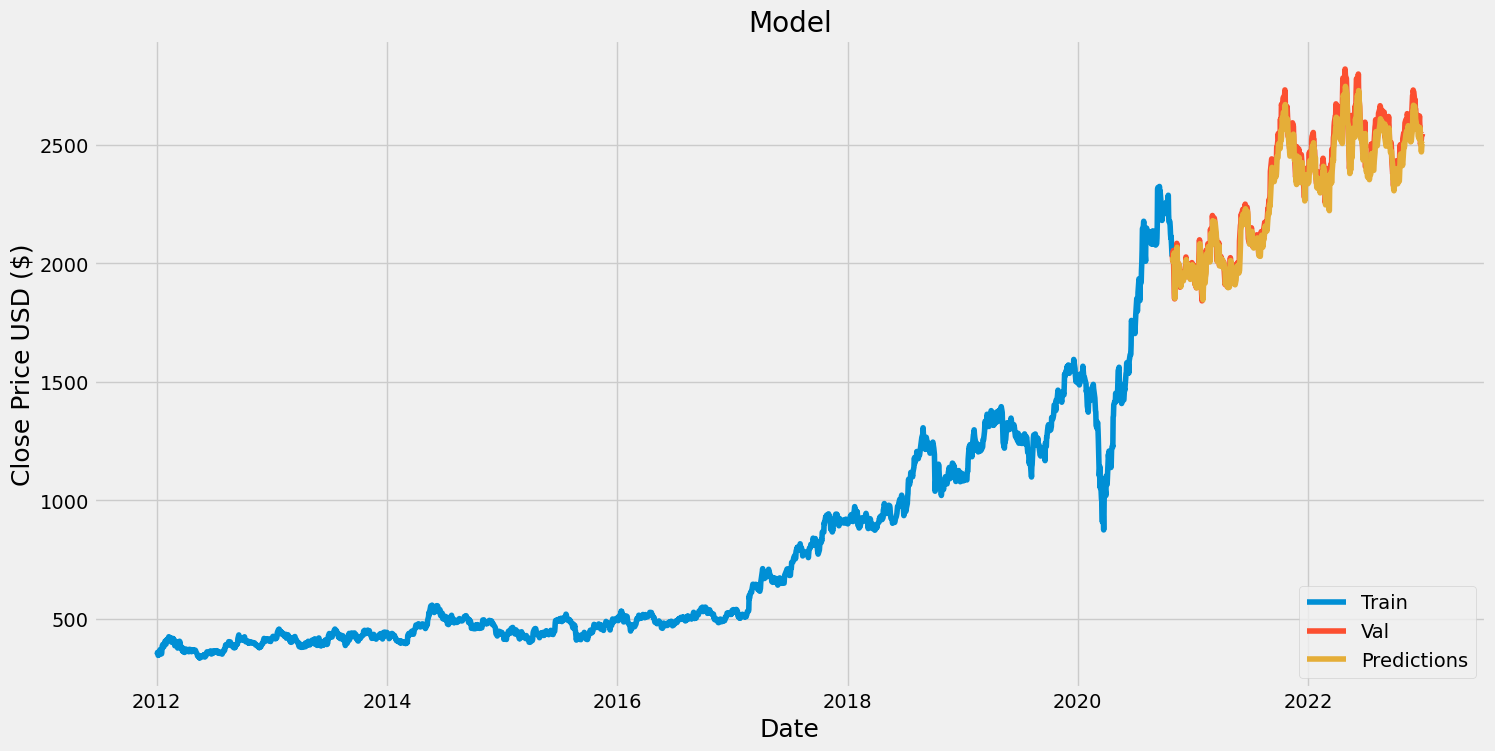

In [19]:
#plot the graph
train = data[:train_dl]
valid = data[train_dl:]
valid['Predictions']= predictions
#visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'], loc='lower right')
plt.show()


Here we can see that the blue line is the part of data used for training the model, the red line is valid values of the closing price and yellow line is the prediction data which is very close to the tha actual valid data. Hence we can say that our model has predicted almost accurate Closing price.